In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

from nltk.stem import PorterStemmer as st

stw = st()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def clean(review):
  
  review = review.lower()
  review = re.sub(r'[^\w\s]' , "", review)
  review = nltk.word_tokenize(review)
  words = [i for i in review if i not in stop_words]
  wer = [stw.stem(i) for i in words]

  return " ".join(wer)

In [ ]:
df['Review'] = df['Review'].apply(clean)

In [ ]:
df.loc[999]['Review']

'hadnt wast enough life pour salt wound draw time took bring check'

In [ ]:
clean(df.loc[999]['Review'])

'hadnt wast enough life pour salt wound draw time took bring check'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as cvv
cv = cvv(max_features = 1300)

In [ ]:
df

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1
...,...,...
995,think food flavor textur lack,0
996,appetit instantli gone,0
997,overal impress would go back,0
998,whole experi underwhelm think well go ninja su...,0


In [ ]:
X = cv.fit_transform(k).toarray()

In [ ]:
X.shape

(1000, 1300)

In [ ]:
y = df['Liked']

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 12)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
classifier.fit(X_train , y_train)

MultinomialNB()

In [ ]:
cross_val_score(classifier , X_train , y_train , cv = 5 , scoring = 'accuracy').mean()

0.76875

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       101
           1       0.73      0.82      0.77        99

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
er = LogisticRegression()

In [ ]:
er.fit(X_train , y_train)

LogisticRegression()

In [ ]:
yq_pred = er.predict(X_test)

In [ ]:
print(classification_report(y_test , yq_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       101
           1       0.73      0.78      0.75        99

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train , y_train)

m = rf.predict(X_test)

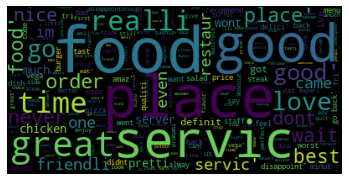

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = df['Review'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

lets use textboob polarity on training set and evaluate the predictions with actual test - data

In [ ]:
from textblob import TextBlob


first 200 records

In [ ]:
min = df.iloc[0:200,:]

In [ ]:
min.shape

(200, 2)

In [ ]:
def pol(text):

  return TextBlob(text).sentiment.polarity

In [ ]:
min['f'] = min['Review'].apply(pol)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


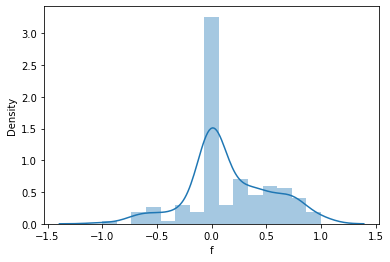

In [ ]:
sns.distplot(min['f'])

predictions on user input

In [ ]:
d = input()


for


In [ ]:
s = clean(d)
s

''

In [ ]:
m = cv.transform([s]).toarray()

In [185]:
classifier.predict(m)[0]

1

In [ ]:
import pickle 
pickle.dump(classifier,open('c.pkl','wb'))
pickle.dump(cv,open('v.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')